# Lab 4: The Multilayer Perceptron

Ryan Schaefer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.special import expit
import copy
import sys

# Load Data

The dataset used in this lab

In [2]:
df = pd.read_csv("../Datasets/acs2017_census_tract_data.csv")

df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [4]:
df.shape

(74001, 37)

In [5]:
df_processed = copy.deepcopy(df)

In [6]:
df_processed = df_processed.drop(["TractId", "County"], axis = 1).dropna()
df_processed.shape

(72718, 35)

In [7]:
df_processed["State"] = df_processed["State"].astype('category').cat.codes
# df_processed["County"] = df_processed["County"].astype('category').cat.codes

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int8   
 1   TotalPop          72718 non-null  int64  
 2   Men               72718 non-null  int64  
 3   Women             72718 non-null  int64  
 4   Hispanic          72718 non-null  float64
 5   White             72718 non-null  float64
 6   Black             72718 non-null  float64
 7   Native            72718 non-null  float64
 8   Asian             72718 non-null  float64
 9   Pacific           72718 non-null  float64
 10  VotingAgeCitizen  72718 non-null  int64  
 11  Income            72718 non-null  float64
 12  IncomeErr         72718 non-null  float64
 13  IncomePerCap      72718 non-null  float64
 14  IncomePerCapErr   72718 non-null  float64
 15  Poverty           72718 non-null  float64
 16  ChildPoverty      72718 non-null  float6

## Data Balancing

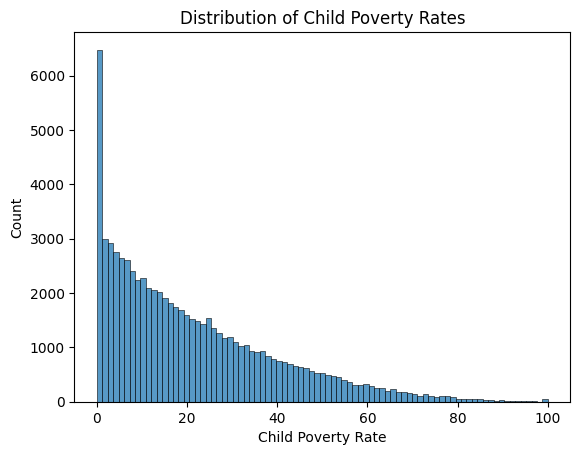

In [8]:
sns.histplot(data = df_processed, x = "ChildPoverty")

plt.title("Distribution of Child Poverty Rates")
plt.xlabel("Child Poverty Rate")

plt.show()

In [9]:
poverty_stats = df_processed["ChildPoverty"].describe()

poverty_stats

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

In [10]:
bins = [
    poverty_stats["min"] - 1,
    poverty_stats["25%"],
    poverty_stats["50%"],
    poverty_stats["75%"],
    poverty_stats["max"] + 1
]

df_processed["ChildPovertyClass"] = pd.cut(
    df_processed["ChildPoverty"],
    bins,
    labels = False
)

df_processed["ChildPovertyClass"].describe()

count    72718.000000
mean         1.498625
std          1.118533
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: ChildPovertyClass, dtype: float64

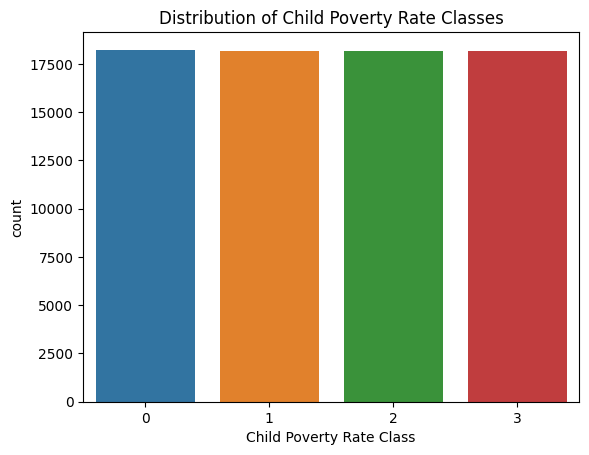

In [11]:
df_processed["ChildPovertyClass"] = df_processed["ChildPovertyClass"].astype(str)

sns.countplot(data = df_processed.sort_values("ChildPovertyClass"), x = "ChildPovertyClass")

plt.title("Distribution of Child Poverty Rate Classes")
plt.xlabel("Child Poverty Rate Class")

plt.show()

In [12]:
df_processed["ChildPovertyClass"] = df_processed["ChildPovertyClass"].astype(int)
df_processed = df_processed.drop("ChildPoverty", axis = 1)

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              72718 non-null  int8   
 1   TotalPop           72718 non-null  int64  
 2   Men                72718 non-null  int64  
 3   Women              72718 non-null  int64  
 4   Hispanic           72718 non-null  float64
 5   White              72718 non-null  float64
 6   Black              72718 non-null  float64
 7   Native             72718 non-null  float64
 8   Asian              72718 non-null  float64
 9   Pacific            72718 non-null  float64
 10  VotingAgeCitizen   72718 non-null  int64  
 11  Income             72718 non-null  float64
 12  IncomeErr          72718 non-null  float64
 13  IncomePerCap       72718 non-null  float64
 14  IncomePerCapErr    72718 non-null  float64
 15  Poverty            72718 non-null  float64
 16  Professional       727

## Training/Testing Split

In [13]:
df_temp = copy.deepcopy(df_processed)
y = df_temp.pop("ChildPovertyClass").to_numpy()
X = df_temp.to_numpy()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 7324)

# Initial Modeling

In [15]:
class TwoLayerPerceptron(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None,
                 alpha=0.0, decrease_const=0.0, decrease_iter = 10, 
                 shuffle=True, minibatches=1):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3+1e-7)+(1-Y_enc)*np.log(1-A3+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                
                
                # simple momentum calculations
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                
                # update previous parameters 
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                
                

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self

In [16]:
hyperparameters = {
    'n_hidden': 50, 
    'C': 1e-2, 
    'epochs': 100, 
    'eta': 0.001, 
    'alpha': 0.1, 
    'decrease_const': 0.1,
    'minibatches': int(len(X_train)/256),
    'shuffle': True,
    'random_state': 7324
}

model_2layer_1 = TwoLayerPerceptron(**hyperparameters)

## No Preprocessing Model

In [17]:
%%time

model_2layer_1.fit(X_train, y_train, print_progress = 1)

yhat_2layer_1 = model_2layer_1.predict(X_test)
print('Accuracy:', accuracy_score(y_test, yhat_2layer_1))

Epoch: 100/100

Accuracy: 0.25268151815181517
CPU times: user 2min 48s, sys: 31.2 s, total: 3min 19s
Wall time: 17.7 s


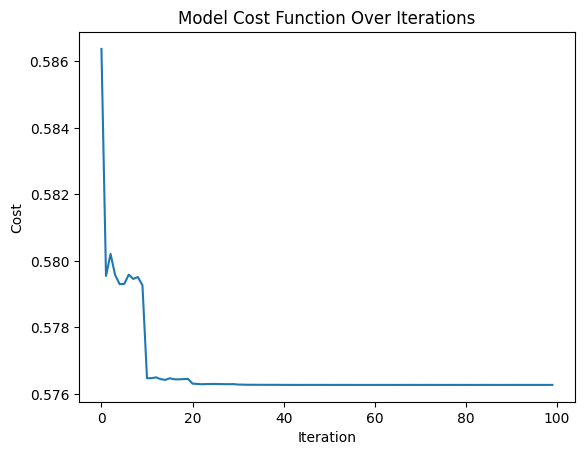

In [18]:
plt.plot(list(map(np.mean, model_2layer_1.cost_)))

plt.title("Model Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

## Normalized Model

In [19]:
normalizer = StandardScaler()
X_norm = normalizer.fit_transform(df_temp)
X_train_norm, X_test_norm = train_test_split(X_norm, test_size = 0.2, random_state = 7324)
model_2layer_2 = TwoLayerPerceptron(**hyperparameters)

In [20]:
%%time

model_2layer_2.fit(X_train_norm, y_train, print_progress = 1)

yhat_2layer_2 = model_2layer_2.predict(X_test_norm)
print('Accuracy:', accuracy_score(y_test, yhat_2layer_2))

Epoch: 100/100

Accuracy: 0.7201595159515951
CPU times: user 3min 4s, sys: 48.1 s, total: 3min 53s
Wall time: 20.4 s


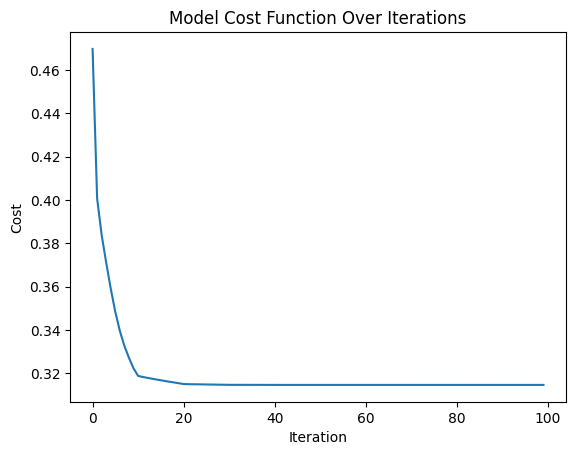

In [21]:
plt.plot(list(map(np.mean, model_2layer_2.cost_)))

plt.title("Model Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

## One-Hot Encoded Model

In [22]:
df_onehot = copy.deepcopy(df_temp)

# county_dummies = pd.get_dummies(df_onehot["County"]).add_prefix("county_")
state_dummies = pd.get_dummies(df_onehot["State"]).add_prefix("state_")

df_onehot = df_onehot.join(state_dummies)
df_onehot = df_onehot.drop("State", axis = 1)
X_norm_onehot = normalizer.fit_transform(df_onehot)

X_train_norm_onehot, X_test_norm_onehot = train_test_split(X_norm_onehot, test_size = 0.2, random_state = 7324)
model_2layer_3 = TwoLayerPerceptron(**hyperparameters)

In [23]:
%%time

model_2layer_3.fit(X_train_norm_onehot, y_train, print_progress = 1)

yhat_2layer_3 = model_2layer_3.predict(X_test_norm_onehot)
print('Accuracy:', accuracy_score(y_test, yhat_2layer_3))

Epoch: 100/100

Accuracy: 0.6914191419141914
CPU times: user 3min 6s, sys: 50.7 s, total: 3min 57s
Wall time: 20.6 s


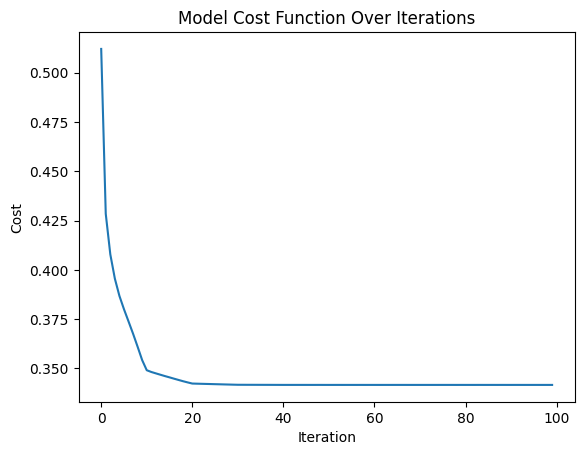

In [24]:
plt.plot(list(map(np.mean, model_2layer_3.cost_)))

plt.title("Model Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

## Model Comparison

In [25]:
# Function to conduct the McNemar test for two sets of predictions
# Returns true if we reject the null hypothesis (the models are different)
def mcnemar_test(y, yhat1, yhat2):
    # Calculate B and C
    B = 0
    C = 0
    for i in range(len(y)):
        # If yhat1 and yhat2 match, then neither B nor C
        if yhat1[i] == yhat2[i]:
            continue
        else:
            # If yhat1 and y match, then B
            if y[i] == yhat1[i]:
                B += 1
            # Else, C
            else:
                C += 1
    
    # Calculate test statistic
    x2 = ((abs(B - C) - 1) ** 2) / (B + C)
    
    # Determine if we should reject the null hypothesis or not
    return x2 > 3.841

In [26]:
models_compare = pd.DataFrame({
    "Model 1": [ "No Preprocessing", "No Preprocessing", "Normalized"],
    "Model 2": [ "Normalized", "One-Hot Encoded", "One-Hot Encoded"],
    "Models Are Different": [
        mcnemar_test(y_test, yhat_2layer_1, yhat_2layer_2),
        mcnemar_test(y_test, yhat_2layer_1, yhat_2layer_3),
        mcnemar_test(y_test, yhat_2layer_2, yhat_2layer_3)
    ]
})

display(models_compare)

,Model 1,Model 2,Models Are Different
0,No Preprocessing,Normalized,True
1,No Preprocessing,One-Hot Encoded,True
2,Normalized,One-Hot Encoded,True


# Multi-Layer Modeling

In [27]:
class MultiLayerPerceptron(object):
    def __init__(self, layers = 2, n_hidden=[30],
                 C=0.0, epochs=500, eta=0.001, random_state=None,
                 alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1):
        np.random.seed(random_state)
        self.n_hidden = copy.deepcopy(n_hidden)
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.layers = layers
        
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        W = []
        b = []
        for i in range(self.layers):
            init_bound = 4 * np.sqrt(6. / (self.n_hidden[i + 1] + self.n_hidden[i]))
            curr_W = np.random.uniform(-init_bound, init_bound, (self.n_hidden[i + 1], self.n_hidden[i]))
            curr_W[:, :1] = 0
            W.append(curr_W)
            b.append(np.zeros((self.n_hidden[i + 1], 1)))

        return W, b
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _L2_reg(lambda_, W):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        terms = 0
        for term in W:
            terms += np.mean(term[:, 1:] ** 2)
        return (lambda_) * np.sqrt(terms)
    
    def _cost(self,A,Y_enc,W):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A)+(1-Y_enc)*np.log(1-A))))
        L2_term = self._L2_reg(self.l2_C, W)
        return cost + L2_term
    
    def _feedforward(self, X, W, b):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A = []
        Z = []
        for i in range(self.layers):
            if i == 0:
                A.append(X.T)
            else:
                A.append(self._sigmoid(Z[i - 1]))
            Z.append(W[i] @ A[i] + b[i])
        A.append(self._sigmoid(Z[self.layers - 1]))

        return A, Z
    
    def _get_gradient(self, A, Z, Y_enc, W):
        """ Compute gradient step using backpropagation.
        """
        V = []
        grad = []
        gradb = []
        
        V.append(A[self.layers] - Y_enc)
        for i in range(self.layers - 1, 0, -1):
            V.insert(0, A[i] * (1 - A[i]) * (W[i].T @ V[0]))

        for i in range(self.layers):
            curr_grad = V[i] @ A[i].T
            curr_grad += W[i] * self.l2_C
            grad.append(curr_grad)
            gradb.append(np.sum(V[i], axis = 1).reshape((-1, 1)))

        return grad, gradb
    
    def predict(self, X):
        """Predict class labels"""
        A, Z = self._feedforward(X, self.W, self.b)
        y_pred = np.argmax(A[self.layers], axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.n_hidden.insert(0, self.n_features_)
        self.n_hidden.append(self.n_output_)
        self.W, self.b = self._initialize_weights()

        # Array to store gradient magnitudes
        self.grads_ = []
        # Array to store prev rho values
        rho_W_prev = []
        for i in range(self.layers):
            self.grads_.append(np.zeros(self.epochs))
            rho_W_prev.append(np.zeros(self.W[i].shape))

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A, Z = self._feedforward(X_data[idx], self.W, self.b)
                
                cost = self._cost(A[self.layers], Y_enc[:, idx], self.W)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad, gradb = self._get_gradient(A, Z, Y_enc[:, idx], self.W)

                # momentum calculations
                for j in range(self.layers):
                    rho = eta * grad[j]
                    self.W[j] -= rho + (self.alpha * rho_W_prev[j])
                    rho_W_prev[j] = rho
                    
                    # no need for momentum in bias 
                    # these values need to change abruptly and 
                    # do not influence sensitivity backward
                    self.b[j] -= eta * gradb[j]
                    
                    # Store gradient magnitudes
                    self.grads_[j][i] = np.mean(np.abs(grad[j]))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self
    
    # Get the gradient magnitudes for the specified layer or all layers is param set to None
    def get_gradients_(self, layer = None):
        if layer == None:
            return self.grads_
        else:
            return self.grads_[layer - 1]
        
    # Generate a visualization of the gradient magnitudes for each layer over the epochs
    def plot_gradients_(self):
        ax = plt.subplot(1,1,1)
        for i in range(self.layers):
            plt.plot(self.grads_[i], label='w{}'.format(i + 1))
        plt.legend()
        plt.ylabel('Average gradient magnitude')
        plt.xlabel('Iteration')
        plt.show()

## 3 Layers

In [28]:
hyperparameters["n_hidden"] = [50, 40]
hyperparameters["layers"] = 3

model_3layer = MultiLayerPerceptron(**hyperparameters)

In [29]:
%%time

model_3layer.fit(X_train_norm_onehot, y_train, print_progress = 1)

yhat_3layer = model_3layer.predict(X_test_norm_onehot)
print('Accuracy:', accuracy_score(y_test, yhat_3layer))

Epoch: 100/100

Accuracy: 0.7323294829482948
CPU times: user 5min 35s, sys: 1min 6s, total: 6min 41s
Wall time: 35.1 s


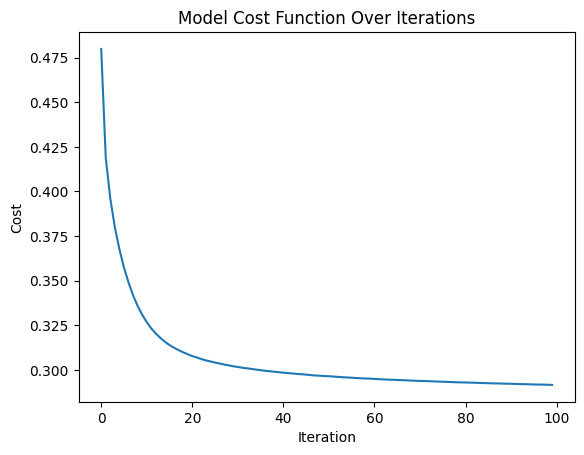

In [30]:
plt.plot(list(map(np.mean, model_3layer.cost_)))

plt.title("Model Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

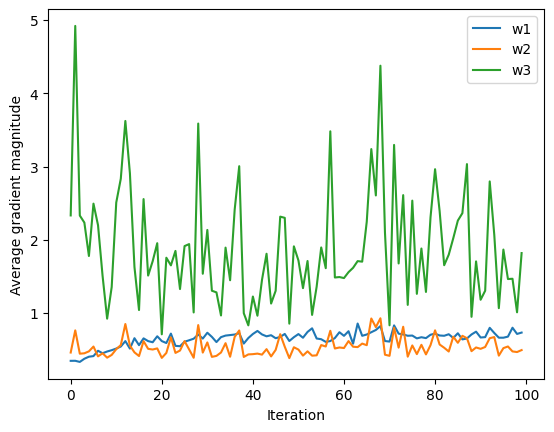

In [31]:
model_3layer.plot_gradients_()

## 4 Layers

In [32]:
hyperparameters["n_hidden"] = [50, 40, 30]
hyperparameters["layers"] = 4

model_4layer = MultiLayerPerceptron(**hyperparameters)

In [33]:
%%time

model_4layer.fit(X_train_norm_onehot, y_train, print_progress = 1)

yhat_4layer = model_4layer.predict(X_test_norm_onehot)
print('Accuracy:', accuracy_score(y_test, yhat_4layer))

Epoch: 100/100

Accuracy: 0.7321919691969196
CPU times: user 8min 24s, sys: 1min 25s, total: 9min 49s
Wall time: 52.1 s


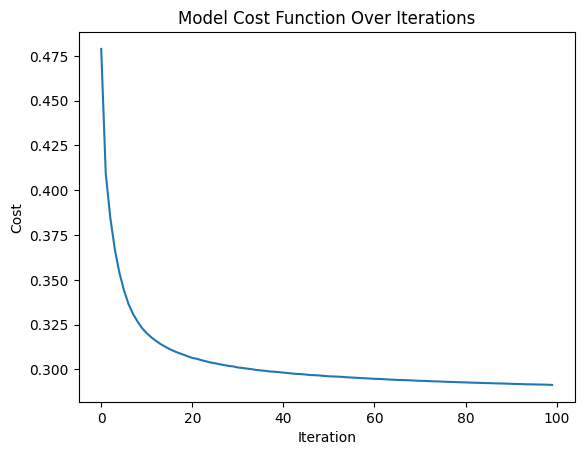

In [34]:
plt.plot(list(map(np.mean, model_4layer.cost_)))

plt.title("Model Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

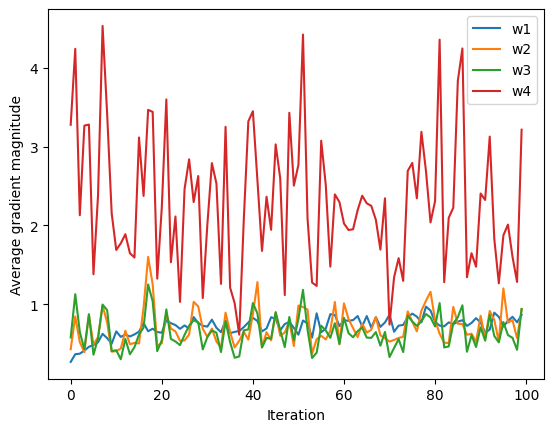

In [35]:
model_4layer.plot_gradients_()

## 5 Layers

In [36]:
hyperparameters["n_hidden"] = [50, 40, 30, 20]
hyperparameters["layers"] = 5

model_5layer = MultiLayerPerceptron(**hyperparameters)

In [37]:
%%time

model_5layer.fit(X_train_norm_onehot, y_train, print_progress = 1)

yhat_5layer = model_5layer.predict(X_test_norm_onehot)
print('Accuracy:', accuracy_score(y_test, yhat_5layer))

Epoch: 100/100

Accuracy: 0.7292354235423543
CPU times: user 8min 8s, sys: 1min 29s, total: 9min 38s
Wall time: 50.2 s


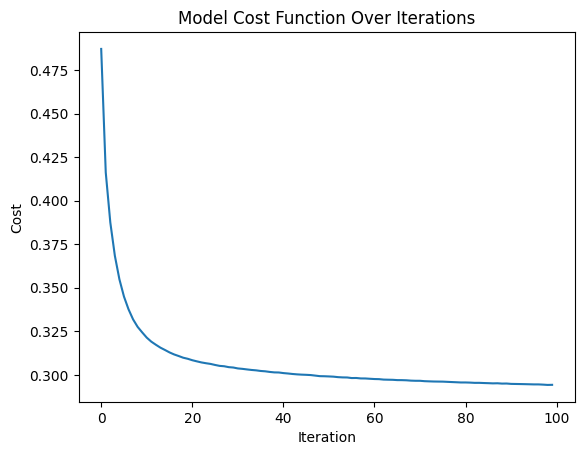

In [38]:
plt.plot(list(map(np.mean, model_5layer.cost_)))

plt.title("Model Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

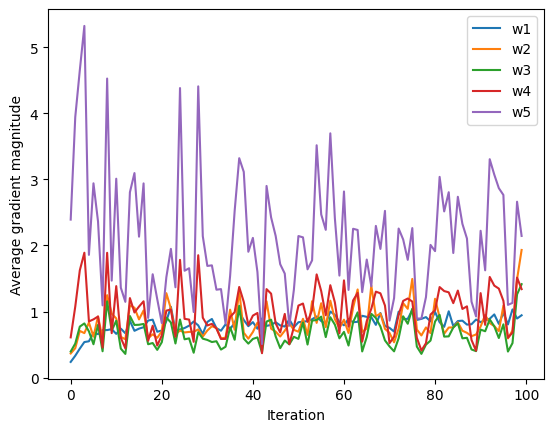

In [39]:
model_5layer.plot_gradients_()

## Adaptive Learning (RMSProp)

In [40]:
class MLPAdaptiveRMSProp(MultiLayerPerceptron):
    def __init__(self, epsilon = 1e-7, **kwds):
        self.epsilon = epsilon
        super().__init__(**kwds)
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.n_hidden.insert(0, self.n_features_)
        self.n_hidden.append(self.n_output_)
        self.W, self.b = self._initialize_weights()
        
        # Array to store gradient magnitudes
        self.grads_ = []
        # Array to store prev rho values
        rho_W_prev = []
        # Array to store prev V values
        V_prev = []
        for i in range(self.layers):
            self.grads_.append(np.zeros(self.epochs))
            rho_W_prev.append(np.zeros(self.W[i].shape))
            V_prev.append(np.zeros(self.W[i].shape))
            
        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A, Z = self._feedforward(X_data[idx], self.W, self.b)
                
                cost = self._cost(A[self.layers], Y_enc[:, idx], self.W)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad, gradb = self._get_gradient(A, Z, Y_enc[:, idx], self.W)

                # momentum calculations
                for j in range(self.layers):
                    # RMSProp calculations
                    G = grad[j] * grad[j]
                    V = self.alpha * V_prev[j] + (1 - self.alpha) * G
                    rho = eta * grad[j] / np.sqrt(V + self.epsilon)
  
                    self.W[j] -= rho + (self.alpha * rho_W_prev[j])
                    rho_W_prev[j] = rho
                    
                    # no need for momentum in bias 
                    # these values need to change abruptly and 
                    # do not influence sensitivity backward
                    self.b[j] -= eta * gradb[j]
                    
                    # Store gradient magnitudes
                    self.grads_[j][i] = np.mean(np.abs(grad[j]))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self

In [41]:
model_5layer_rmsprop = MLPAdaptiveRMSProp(**hyperparameters)

In [42]:
%%time

model_5layer_rmsprop.fit(X_train_norm_onehot, y_train, print_progress = 1)

yhat_5layer_rmsprop = model_5layer_rmsprop.predict(X_test_norm_onehot)
print('Accuracy:', accuracy_score(y_test, yhat_5layer_rmsprop))

Epoch: 100/100

Accuracy: 0.7296479647964796
CPU times: user 8min 36s, sys: 1min 31s, total: 10min 8s
Wall time: 52.8 s


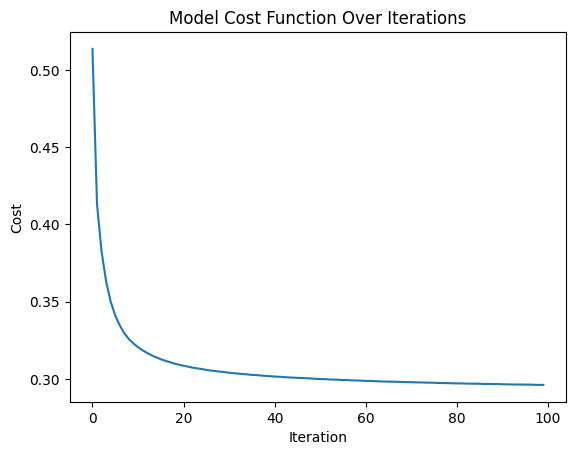

In [43]:
plt.plot(list(map(np.mean, model_5layer_rmsprop.cost_)))

plt.title("Model Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

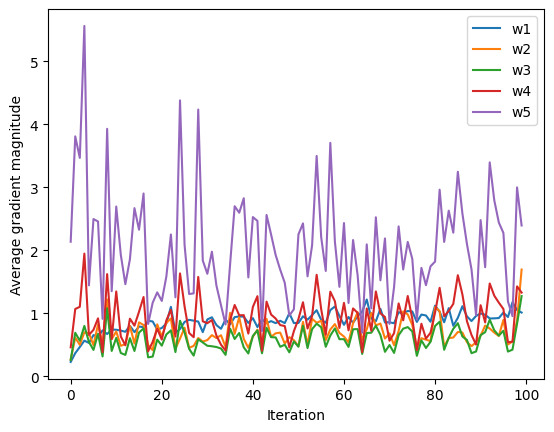

In [44]:
model_5layer_rmsprop.plot_gradients_()

# Adaptive Momentum (AdaM)

In [45]:
class MLPAdaptiveAdaM(MLPAdaptiveRMSProp):
    def __init__(self, beta1 = 0.9, beta2 = 0.999, **kwds):
        self.beta1 = beta1
        self.beta2 = beta2
        super().__init__(**kwds)
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.n_hidden.insert(0, self.n_features_)
        self.n_hidden.append(self.n_output_)
        self.W, self.b = self._initialize_weights()
        
        # Array to store gradient magnitudes
        self.grads_ = []
        # Array to store prev rho values
        rho_W_prev = []
        # Array to store prev V values
        V_prev = []
        # Array to store prev M values
        M_prev = []
        for i in range(self.layers):
            self.grads_.append(np.zeros(self.epochs))
            rho_W_prev.append(np.zeros(self.W[i].shape))
            V_prev.append(np.zeros(self.W[i].shape))
            M_prev.append(np.zeros(self.W[i].shape))
            
        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A, Z = self._feedforward(X_data[idx], self.W, self.b)
                
                cost = self._cost(A[self.layers], Y_enc[:, idx], self.W)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad, gradb = self._get_gradient(A, Z, Y_enc[:, idx], self.W)

                # momentum calculations
                for j in range(self.layers):
                    # AdaM calculations
                    k = i + 1
                    M = self.beta1 * M_prev[j] + (1 - self.beta1) * grad[j]
                    V = self.beta2 * V_prev[j] + (1 - self.beta2) * grad[j] * grad[j]
                    M_hat = M / (1 - self.beta1 ** k)
                    V_hat = V / (1 - self.beta2 ** k)
                    rho = eta * M_hat / (np.sqrt(V_hat + self.epsilon))
  
                    self.W[j] -= rho + (self.alpha * rho_W_prev[j])
                    rho_W_prev[j] = rho
                    
                    # no need for momentum in bias 
                    # these values need to change abruptly and 
                    # do not influence sensitivity backward
                    self.b[j] -= eta * gradb[j]
                    
                    # Store gradient magnitudes
                    self.grads_[j][i] = np.mean(np.abs(grad[j]))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self

In [46]:
model_5layer_adam = MLPAdaptiveAdaM(**hyperparameters)

In [47]:
%%time

model_5layer_adam.fit(X_train_norm_onehot, y_train, print_progress = 1)

yhat_5layer_adam = model_5layer_adam.predict(X_test_norm_onehot)
print('Accuracy:', accuracy_score(y_test, yhat_5layer_adam))

Epoch: 100/100

Accuracy: 0.7281353135313532
CPU times: user 8min 42s, sys: 1min 30s, total: 10min 12s
Wall time: 53.1 s


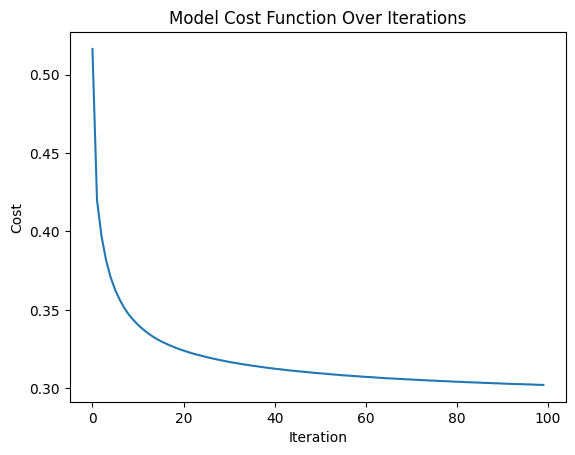

In [48]:
plt.plot(list(map(np.mean, model_5layer_adam.cost_)))

plt.title("Model Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

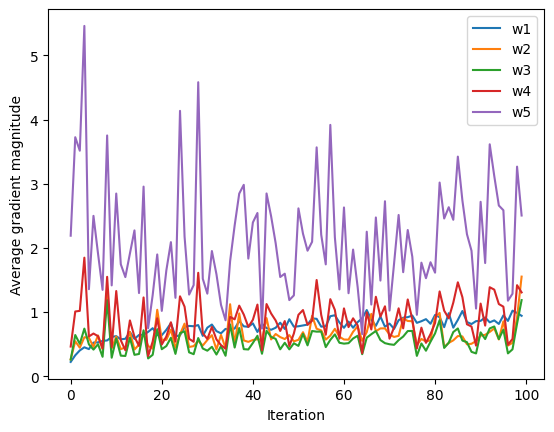

In [49]:
model_5layer_adam.plot_gradients_()